In [1]:
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd

In [3]:
seed = 7
numpy.random.seed(seed)
data = pd.read_csv("C:/Users/pranay/Downloads/gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.shape

(15039, 11)

In [5]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
corr = data.corr()
corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

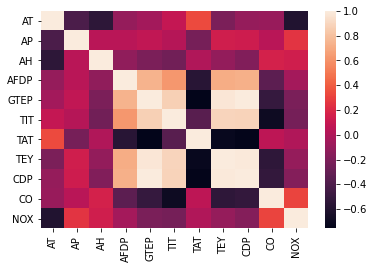

In [8]:
sns.heatmap(corr)

In [9]:
!pip install bokeh

In [10]:
from bokeh.plotting import figure, output_notebook, show

In [57]:
output_notebook()

Loading BokehJS ...

In [36]:
p = figure(plot_width = 400, plot_height = 400)
#plot = figure( title='example',plot_width=1600, plot_height=800, x_range=(0-5, N*step+5))

In [37]:
p.scatter(data['TEY'].head(100), data['AT'].head(100), line_width = 2, color = "green")
show(p)

In [38]:
p.scatter(data['TEY'].tail(100), data['AT'].tail(100), line_width = 2, color = "green")
show(p)

In [40]:
p.scatter(data['TEY'], data['AP'], line_width = 2, color = "green")
show(p)

In [53]:
data[data["TEY"]>=114].value_counts()

AT        AP      AH       AFDP    GTEP    TIT     TAT     TEY     CDP     CO       NOX   
0.58759   1011.3  100.200  6.4027  33.356  1099.8  525.81  168.98  14.178  0.19734  66.698    1
22.35600  1010.5  89.753   3.9658  24.997  1088.6  549.93  131.71  11.927  1.27560  60.317    1
22.32800  1011.3  99.000   4.5195  25.424  1090.1  549.99  133.85  12.090  1.83970  60.311    1
22.33200  1008.3  83.284   4.1499  25.291  1088.8  549.79  133.82  12.021  1.59430  62.998    1
22.33800  1008.6  81.248   4.0685  25.439  1089.3  549.66  133.77  11.963  1.58920  60.677    1
                                                                                             ..
12.85300  1006.4  90.306   5.0799  24.642  1085.7  550.14  134.42  11.912  1.31670  74.526    1
          1013.4  75.254   3.7211  30.680  1100.0  533.92  157.78  13.668  0.57282  72.781    1
12.85400  1017.6  82.207   4.1783  24.283  1087.2  550.10  134.37  11.918  1.63210  69.817    1
12.85700  1013.6  84.855   4.7871  32.363  11

In [26]:
#ct = pd.crosstab(data['TEY'], data['AT'])

In [ ]:
#sns.set(style='darkgrid')
#ct.plot(kind='bar', stacked=True)
#plt.title('Passenger Class and Survival Status')
#plt.xlabel('Passenger Class')
#plt.ylabel('Number of Passengers')
#plt.show()

AT


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


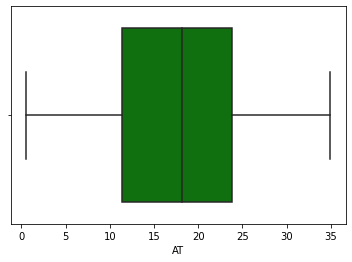

AP


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


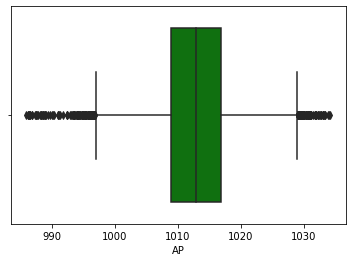

AH


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


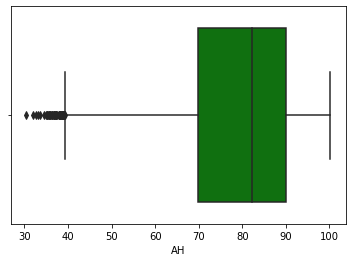

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AFDP


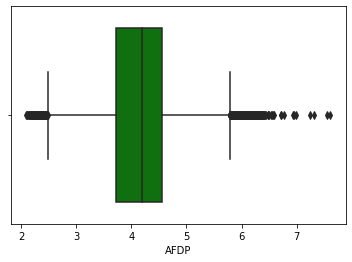

GTEP


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


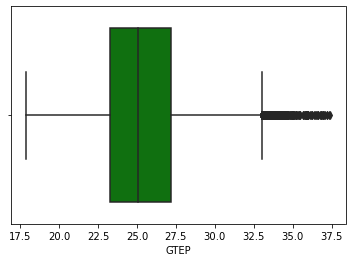

TIT


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


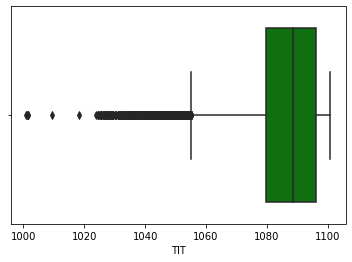

TAT


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


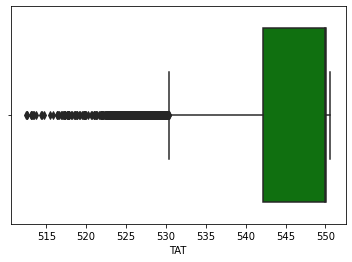

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TEY


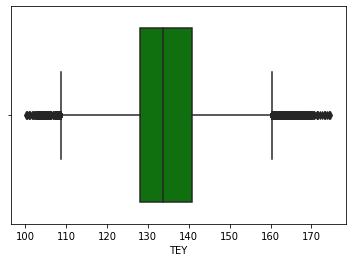

CDP


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


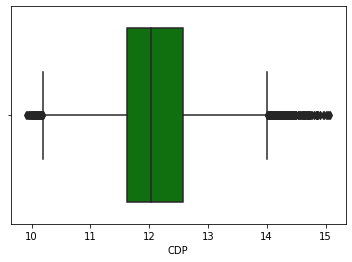

CO


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


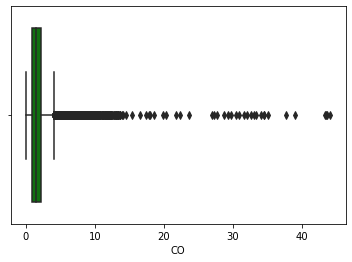

NOX


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


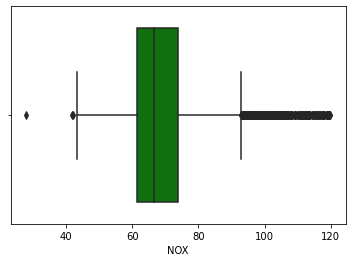

In [10]:
for i in data.columns:
    print(i)
    sns.boxplot(data[i],color = 'green')
    plt.show()

In [66]:
#X = data.iloc[:,:7]
#Y = data['TEY']
X = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
#scaled = StandardScaler()
#X = scaled.fit_transform(X)
#Y = scaled.fit_transform(Y)

In [69]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [70]:
# create model
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [71]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_32 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_33 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_34 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 51        
Total params: 8,251
Trainable params: 8,251
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Fit the model
#history = model.fit(X, Y, validation_split=0.33,epochs=32, batch_size=10)
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
num_epochs = 100
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 1s - loss: 1.1070 - mean_squared_error: 1.1070 - val_loss: 1.2175 - val_mean_squared_error: 1.2175
Epoch 2/100
381/381 - 0s - loss: 0.8219 - mean_squared_error: 0.8219 - val_loss: 0.9861 - val_mean_squared_error: 0.9861
Epoch 3/100
381/381 - 0s - loss: 0.7346 - mean_squared_error: 0.7346 - val_loss: 0.6426 - val_mean_squared_error: 0.6426
Epoch 4/100
381/381 - 0s - loss: 0.7069 - mean_squared_error: 0.7069 - val_loss: 0.7637 - val_mean_squared_error: 0.7637
Epoch 5/100
381/381 - 0s - loss: 0.7684 - mean_squared_error: 0.7684 - val_loss: 0.8534 - val_mean_squared_error: 0.8534


In [81]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.7082 - mean_squared_error: 0.7082


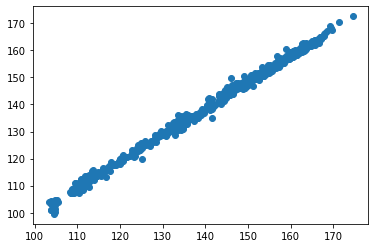

In [76]:
predictions = model.predict_on_batch(X_test_scaled)
plt.scatter(y_test, predictions)

In [82]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.072861,0.287922
1,111.88,110.898384,0.877383
2,133.72,134.598053,0.656635
3,133.79,132.516174,0.952108
4,110.77,110.592842,0.159933
...,...,...,...
1499,132.85,132.247269,0.453693
1500,125.07,119.690834,4.300924
1501,160.95,158.837555,1.312485
1502,133.12,131.749207,1.029743
